In [2]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'o3',
                          'band05_wn_980_1100',
                          'P_1_T_250_min_2e-22_max_5e-17_ng_20_dlogN_uniform__P_50_T_250',
                          'ighigh_7',
                          'wgt_1_1_1_1_1_1_1_.7_.7_.7_.7_.7_.7_.7_.7_.7_.7_.7_.7',
                          'midlatitude_summer',
                          'onetime_version_absgascompare')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'o3',
                               'band05_wn_980_1100',
                               'P_1_T_250_min_2e-22_max_5e-17_ng_20_dlogN_uniform__P_50_T_250',
                               'ighigh_7',
                               'wgt_1_1_1_1_1_1_1_.7_.7_.7_.7_.7_.7_.7_.7_.7_.7_.7_.7',
                               'midlatitude_summer', 
                               'onetime_version_absgascompare')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 20 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
fig.display_hrefanchor()

In [11]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [12]:
table_dgdgs.display_hrefanchor()

In [13]:
for g in range(1, 20 + 1):
    s = 'Table: cooling rate. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

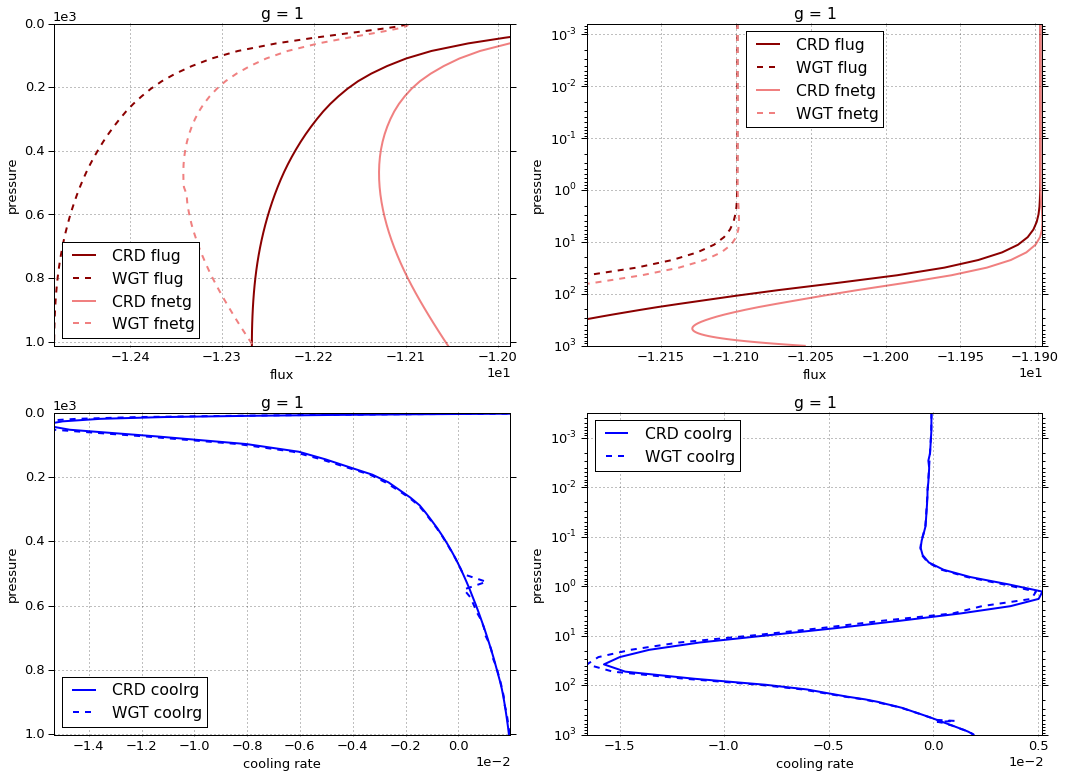

# Figure: flux, cooling rate. g-group 2

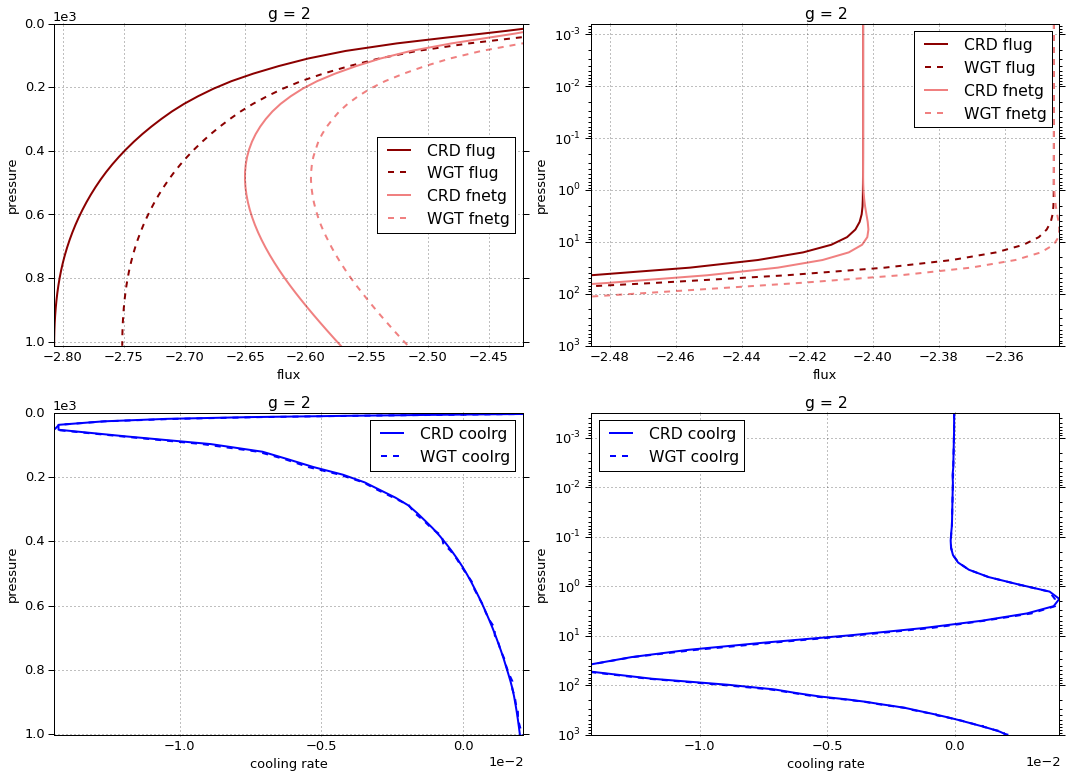

# Figure: flux, cooling rate. g-group 3

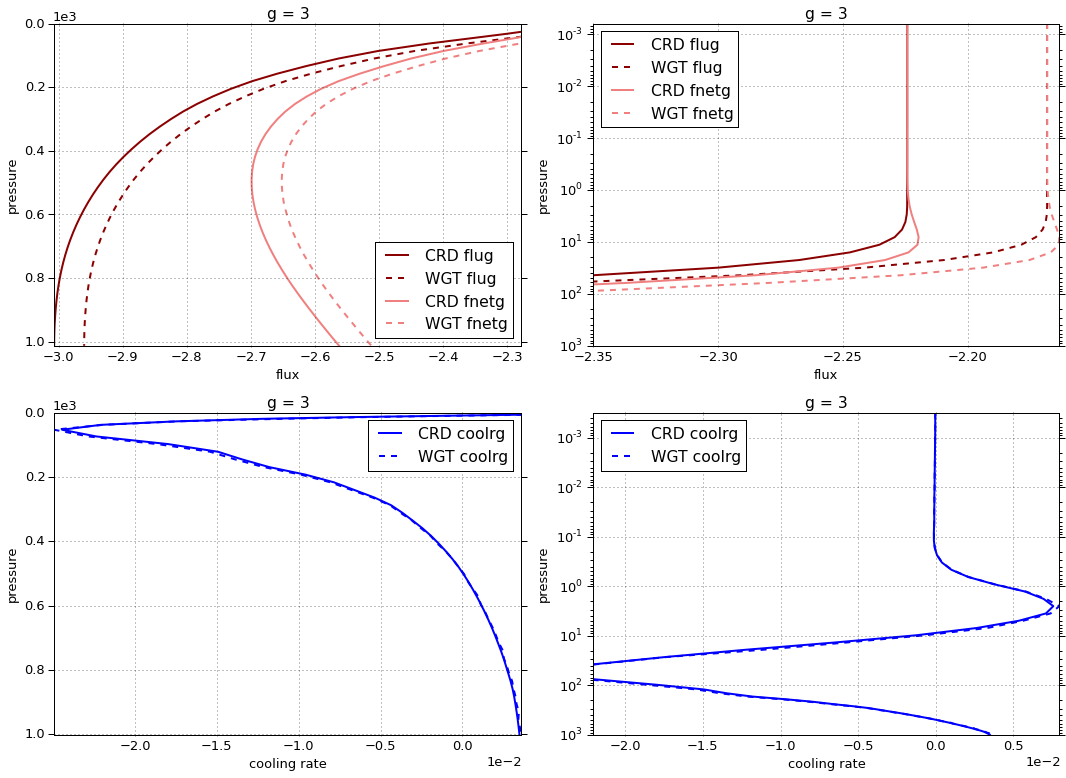

# Figure: flux, cooling rate. g-group 4

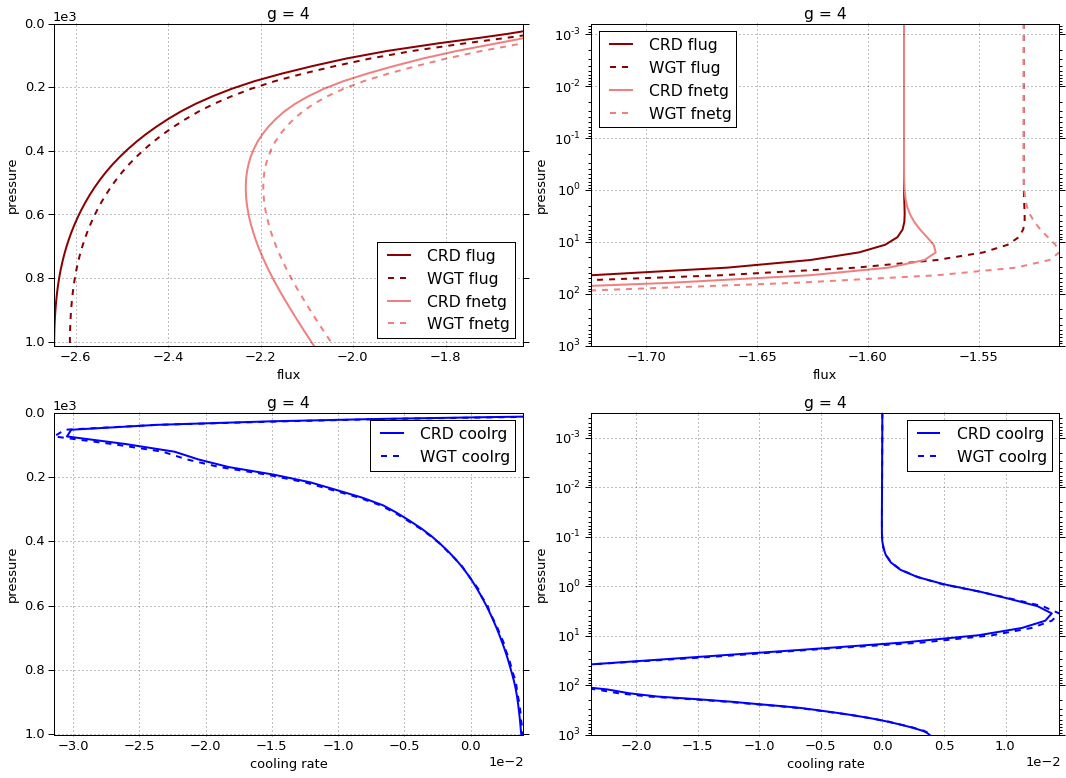

# Figure: flux, cooling rate. g-group 5

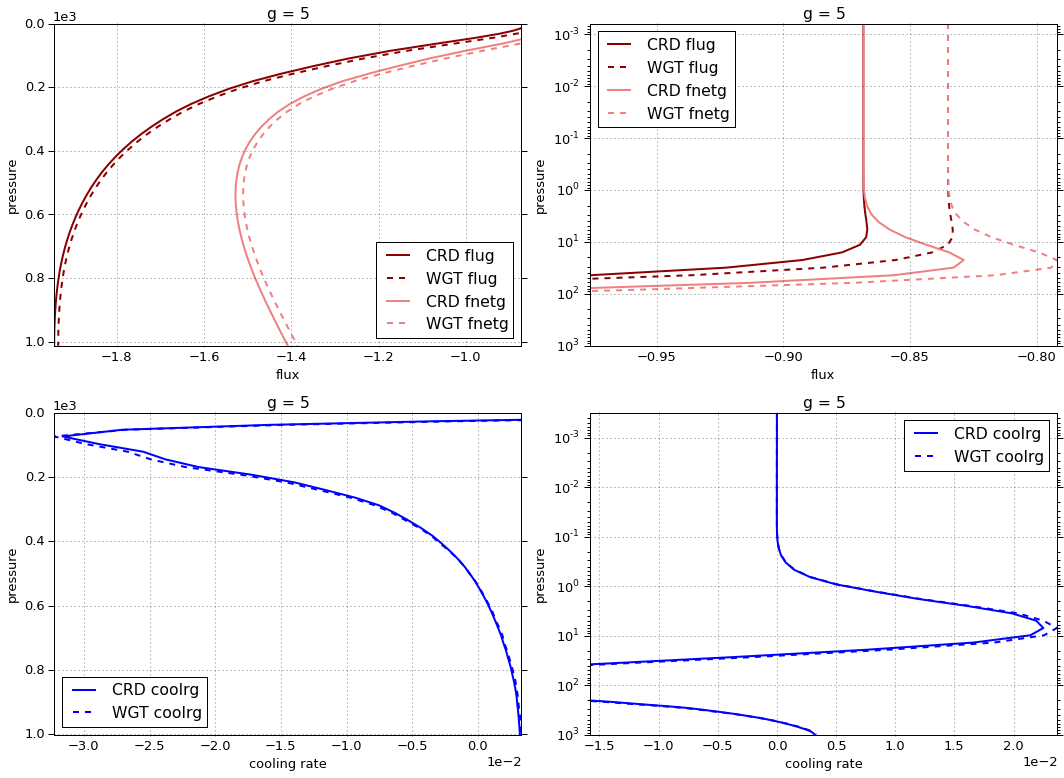

# Figure: flux, cooling rate. g-group 6

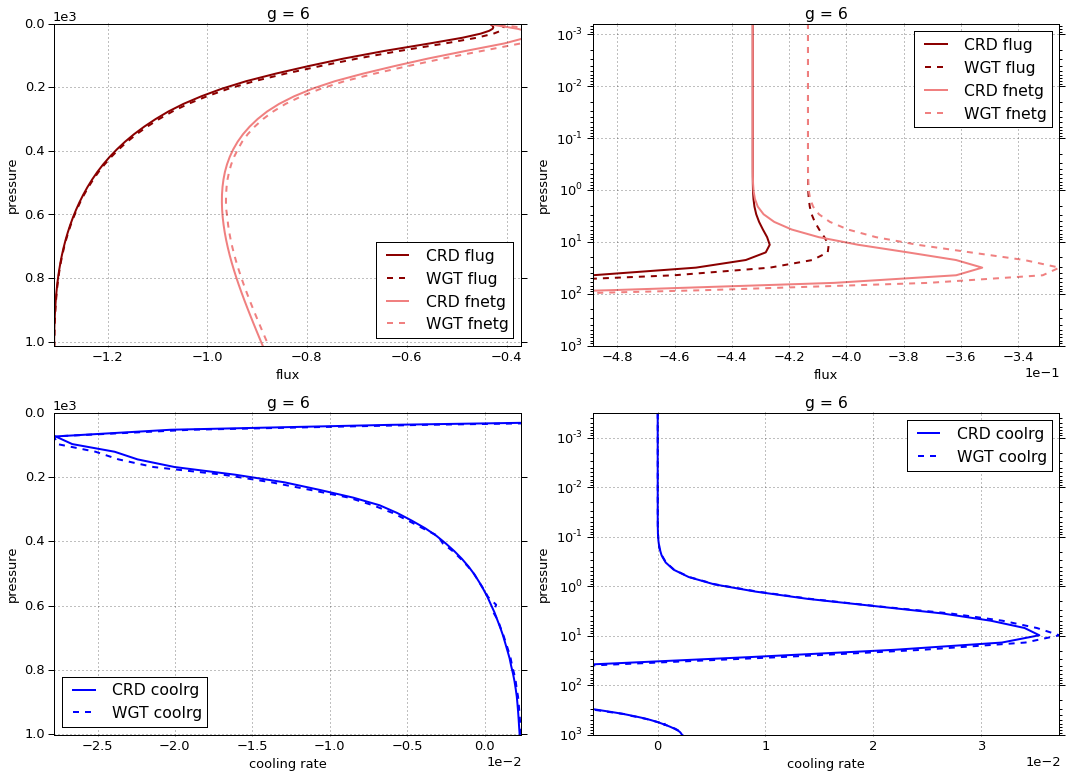

# Figure: flux, cooling rate. g-group 7

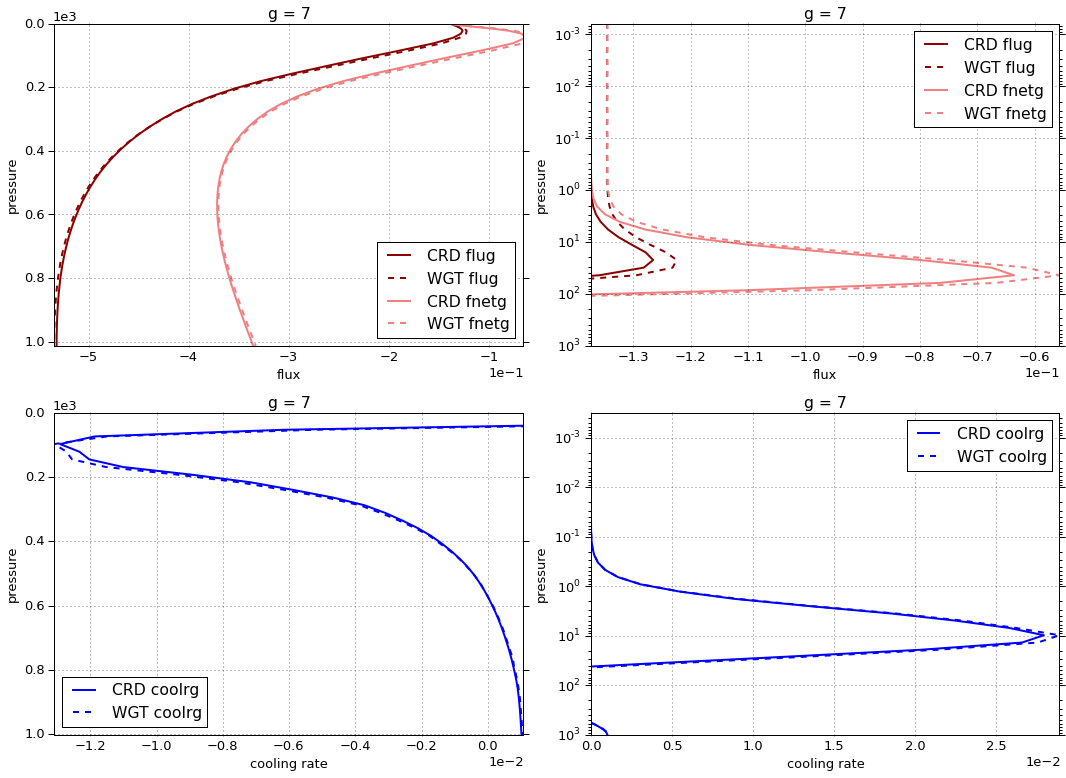

# Figure: flux, cooling rate. g-group 8

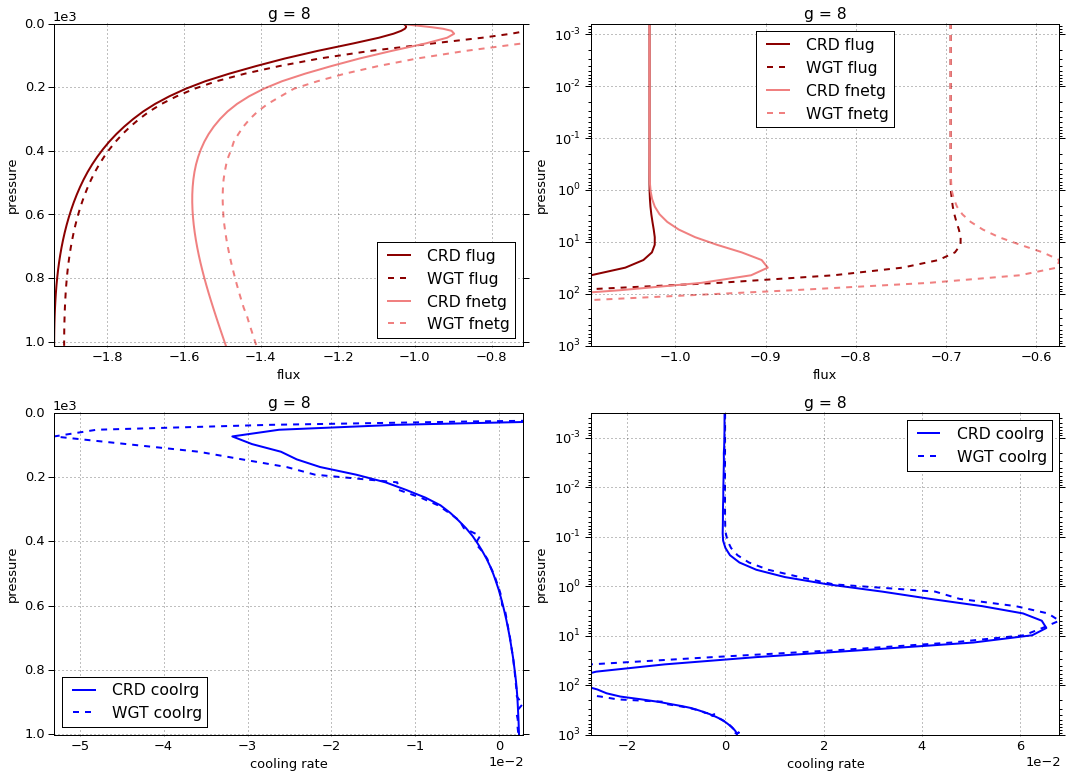

# Figure: flux, cooling rate. g-group 9

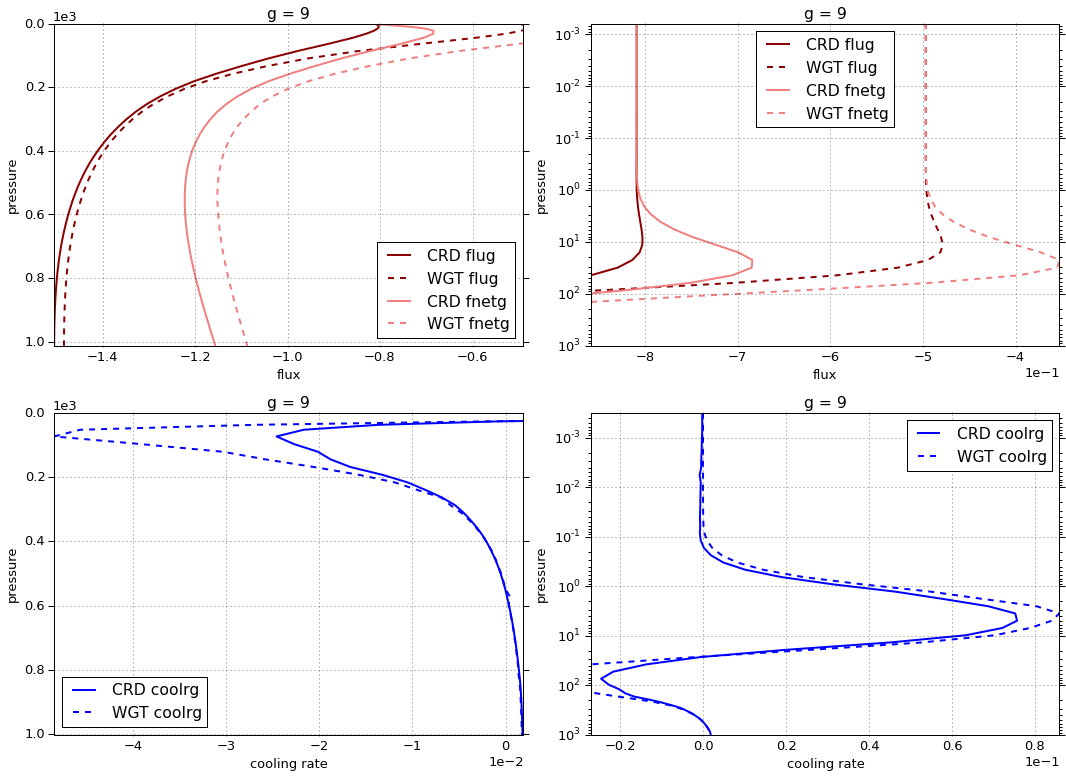

# Figure: flux, cooling rate. g-group 10

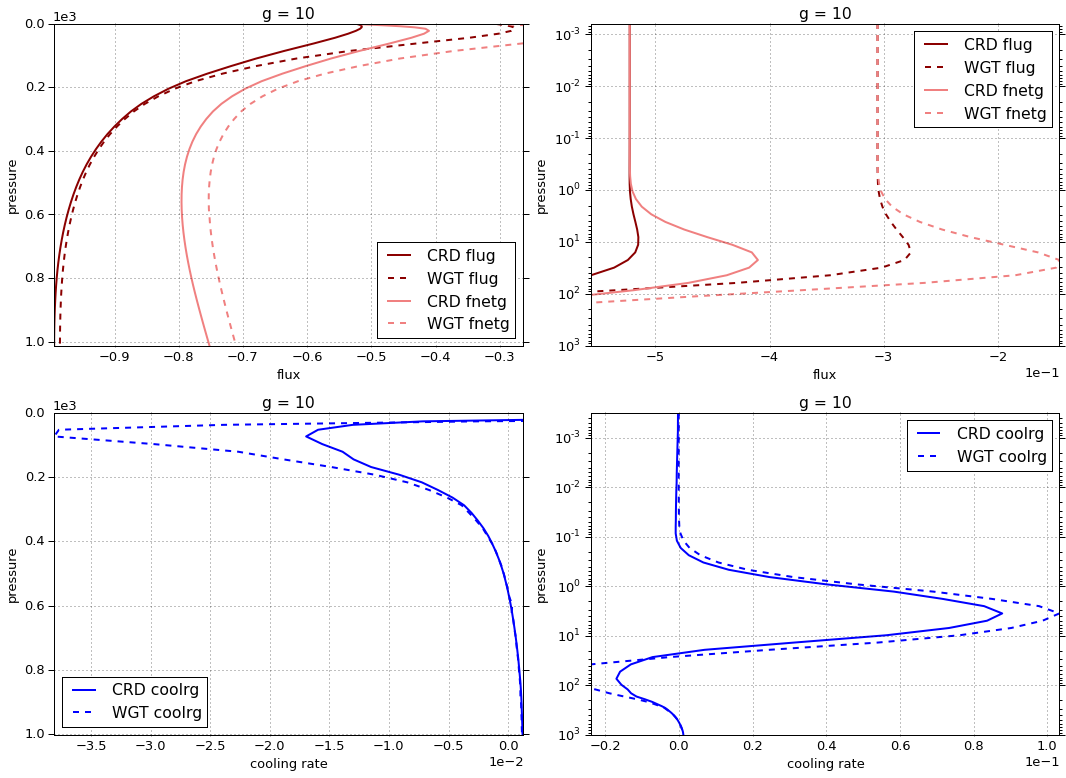

# Figure: flux, cooling rate. g-group 11

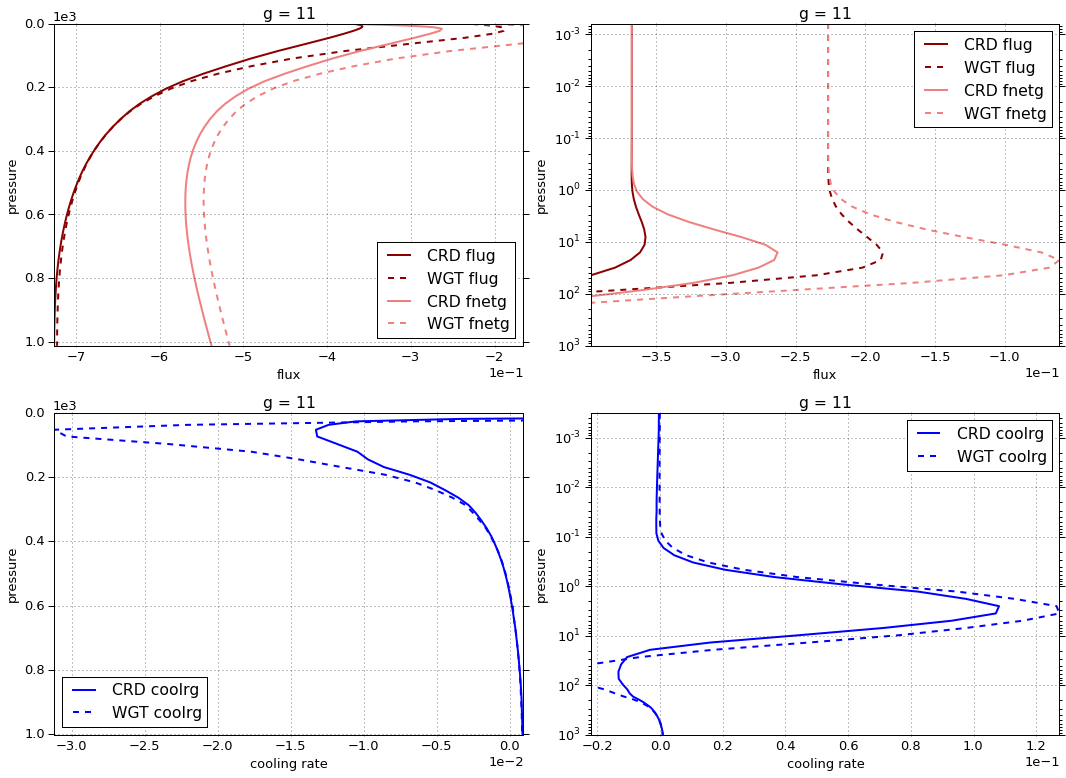

# Figure: flux, cooling rate. g-group 12

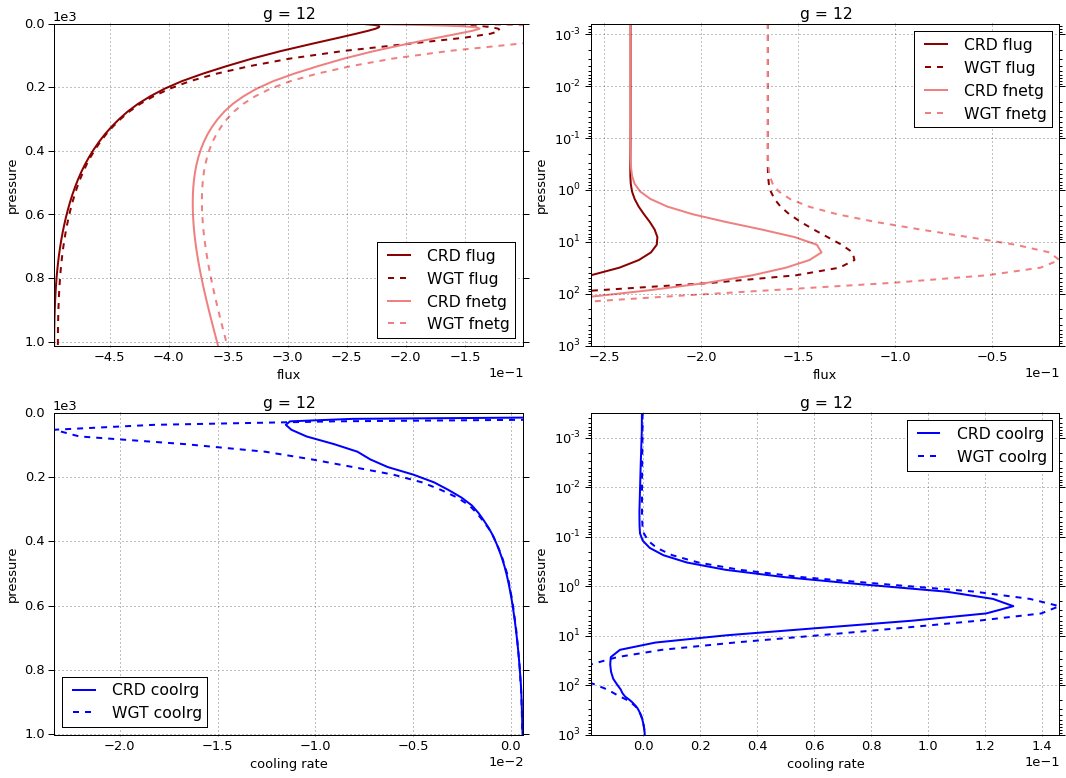

# Figure: flux, cooling rate. g-group 13

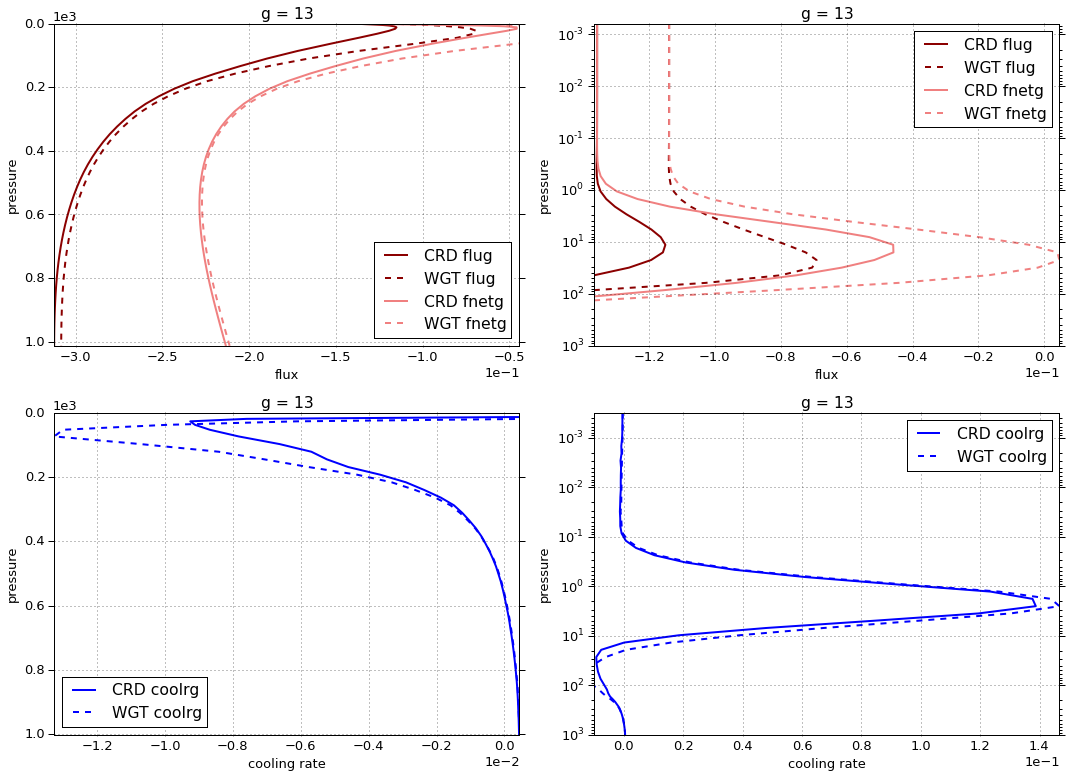

# Figure: flux, cooling rate. g-group 14

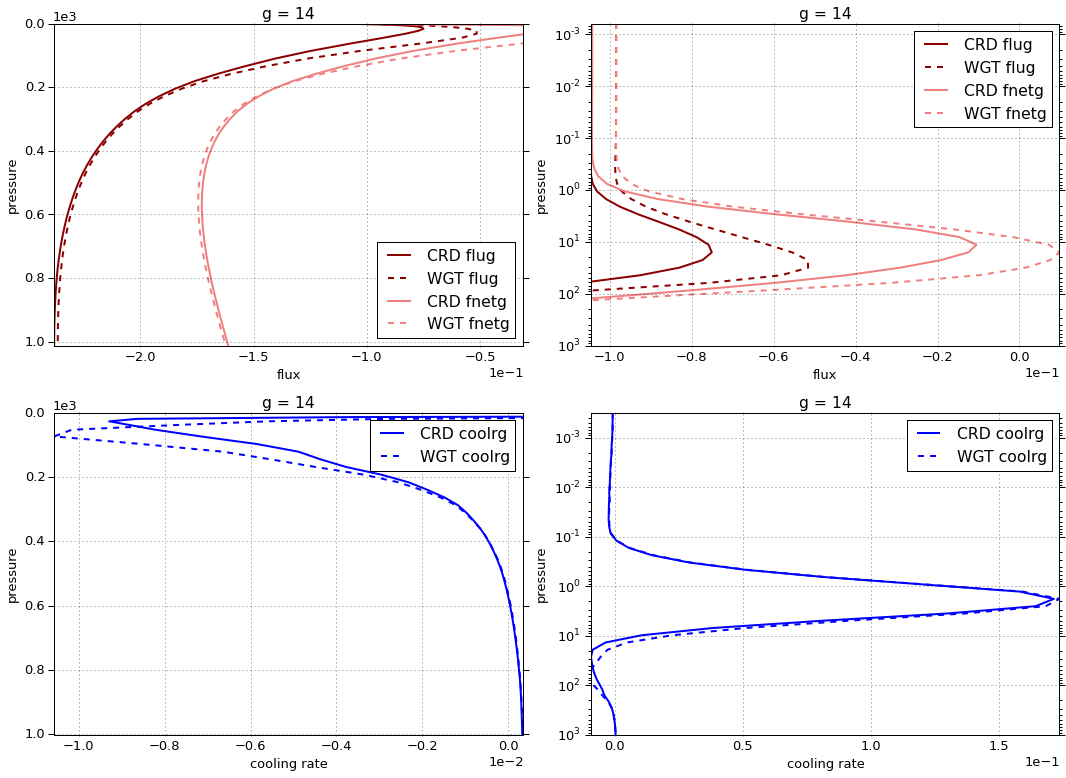

# Figure: flux, cooling rate. g-group 15

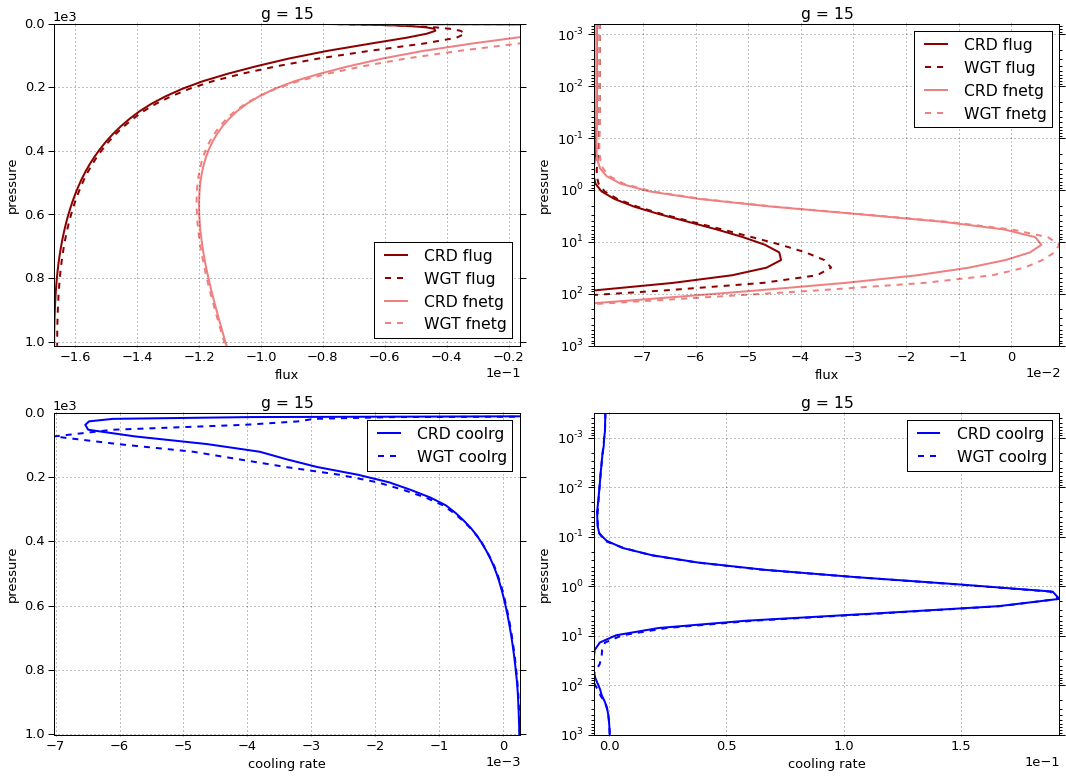

# Figure: flux, cooling rate. g-group 16

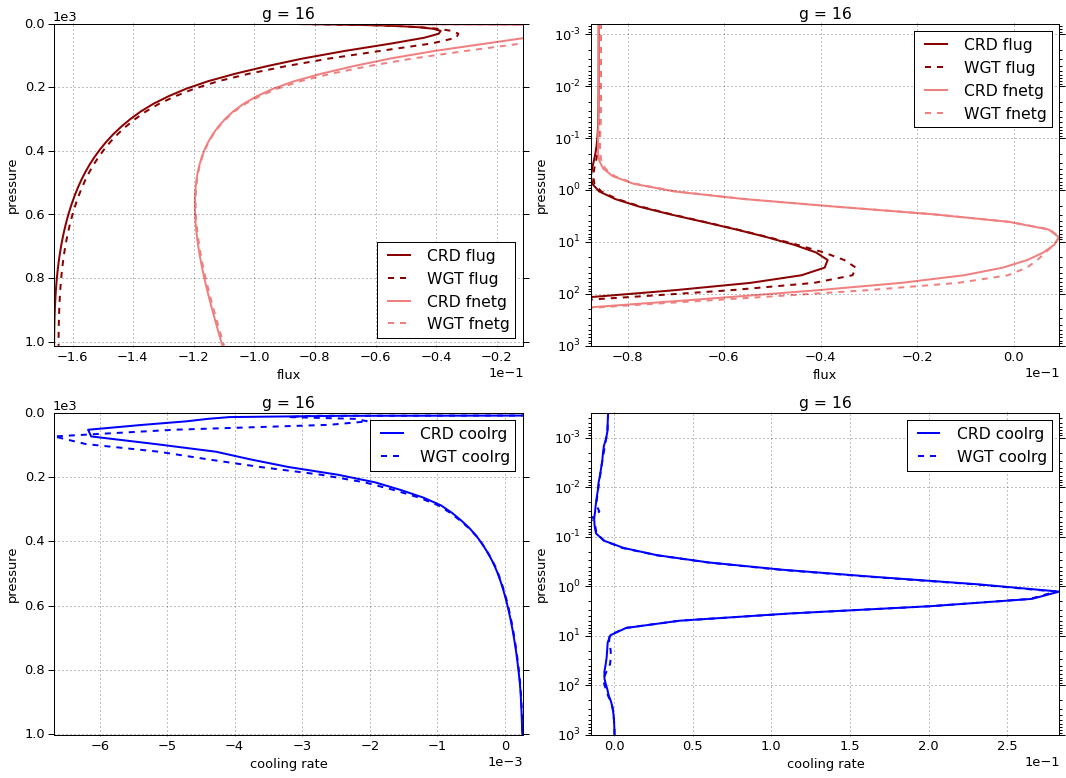

# Figure: flux, cooling rate. g-group 17

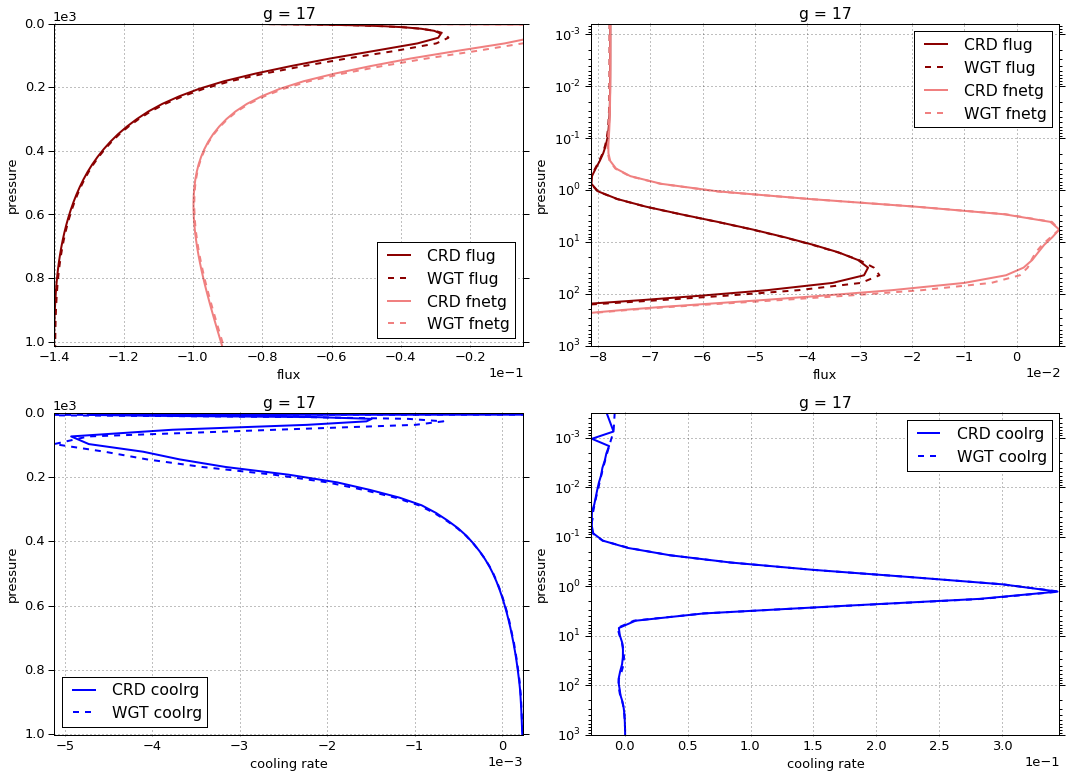

# Figure: flux, cooling rate. g-group 18

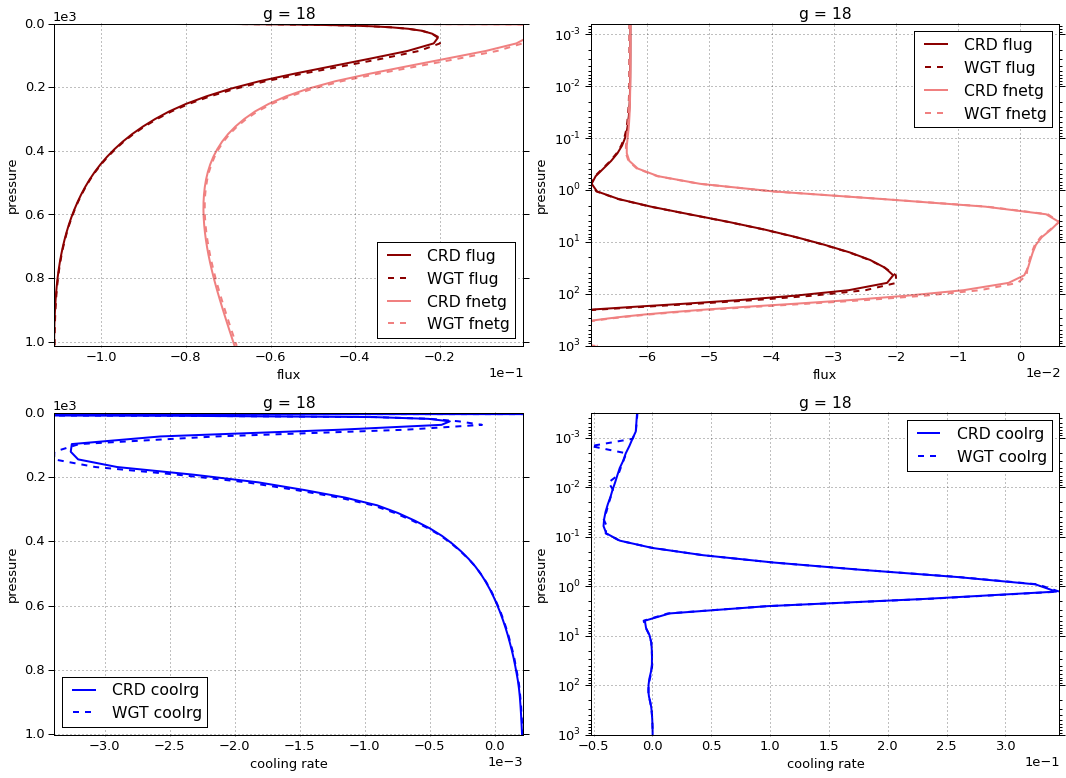

# Figure: flux, cooling rate. g-group 19

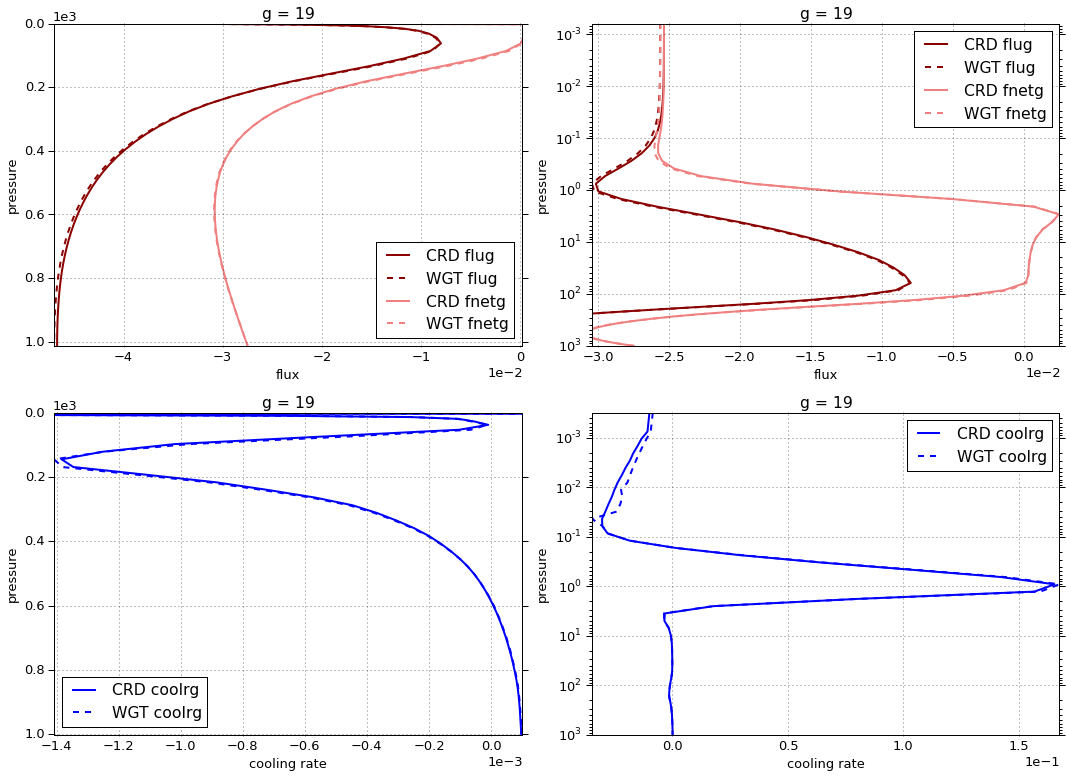

# Figure: flux, cooling rate. g-group 20

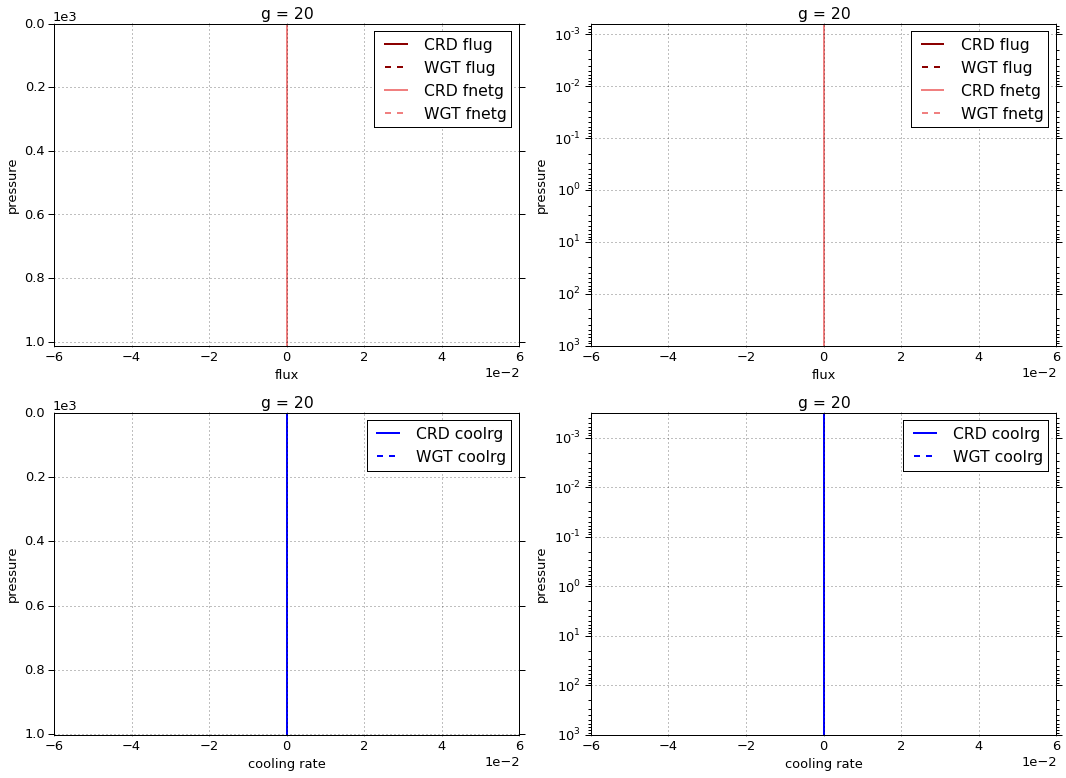

# Figure: flux, cooling rate. g-group total

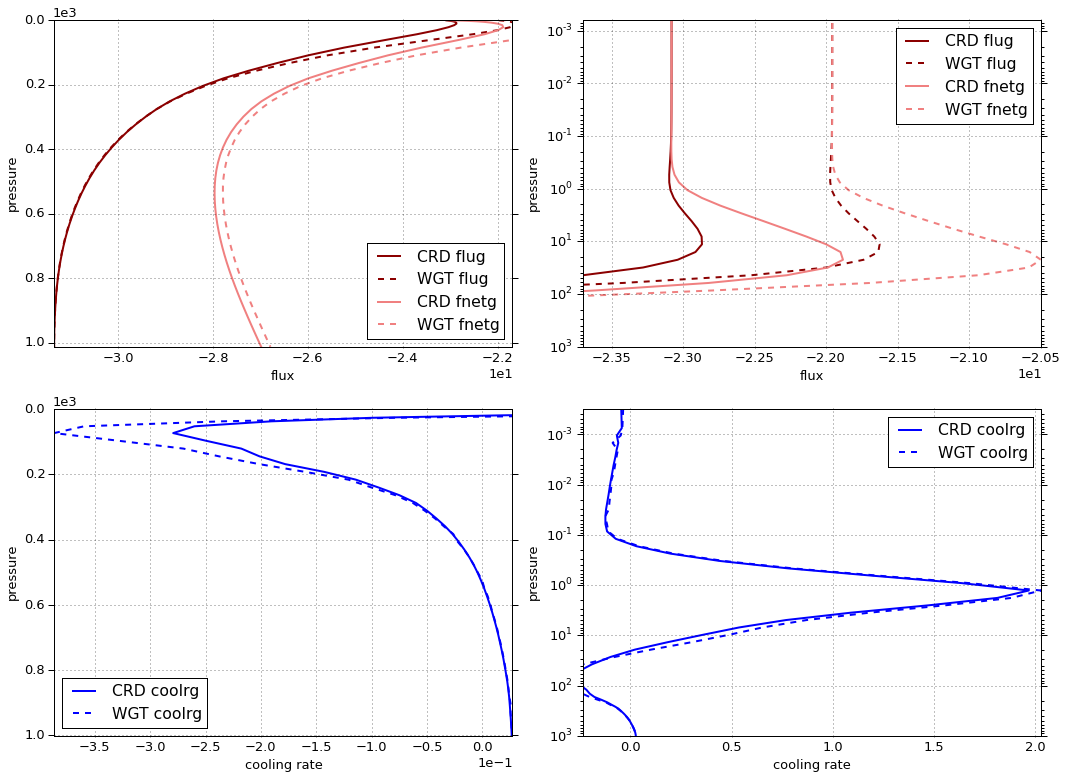

In [14]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [15]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g  pressure level                                
1  0        1     -11.896454  0.000000 -11.896454
   1013     76    -12.267642  0.213648 -12.053994
2  0        1      -2.403057  0.000000  -2.403057
   1013     76     -2.807334  0.235790  -2.571544
3  0        1      -2.224279  0.000000  -2.224279
   1013     76     -3.007179  0.444558  -2.562620
4  0        1      -1.583784  0.000000  -1.583784
   1013     76     -2.646805  0.562022  -2.084782
5  0        1      -0.868410  0.000000  -0.868410
   1013     76     -1.944076  0.535955  -1.408121
6  0        1      -0.432725  0.000000  -0.432725
   1013     76     -1.306971  0.418040  -0.888931
7  0        1      -0.137408  0.000000  -0.137408
   1013     76     -0.531876  0.196258  -0.335618
8  0        1      -1.028502  0.000000  -1.028502
   1013     76     -1.938598  0.447014  -1.491584
9  0        1      -0.809265  0.000000  -0.809265
   1013     76     -1.505361  0.348715  -1.156646
10 0        1      -0.522405  0.000000  -0.522405
   1013     76     -0.994093  0.242018  -0.752075
11 0        1      -0.367579  0.000000  -0.367579
   1013     76     -0.725953  0.187952  -0.538001
12 0        1      -0.236391  0.000000  -0.236391
   1013     76     -0.496961  0.138321  -0.358640
13 0        1      -0.135858  0.000000  -0.135858
   1013     76     -0.312384  0.098955  -0.213429
14 0        1      -0.104337  0.000000  -0.104337
   1013     76     -0.238052  0.076815  -0.161237
15 0        1      -0.078761  0.000000  -0.078761
   1013     76     -0.166891  0.055697  -0.111194
16 0        1      -0.085966  0.000000  -0.085966
   1013     76     -0.166064  0.055519  -0.110545
17 0        1      -0.077680  0.000000  -0.077680
   1013     76     -0.140109  0.048508  -0.091601
18 0        1      -0.062718  0.000000  -0.062718
   1013     76     -0.111153  0.042643  -0.068510
19 0        1      -0.025359  0.000000  -0.025359
   1013     76     -0.046734  0.019236  -0.027498
20 0        1       0.000000  0.000000   0.000000
   1013     76      0.000000  0.000000   0.000000


WGT


flug      fldg      fnetg
g  pressure level                                
1  0        1     -12.099011  0.000000 -12.099011
   1013     76    -12.482905  0.216795 -12.266109
2  0        1      -2.345042  0.000000  -2.345042
   1013     76     -2.751334  0.235122  -2.516212
3  0        1      -2.168236  0.000000  -2.168236
   1013     76     -2.960362  0.448093  -2.512270
4  0        1      -1.529748  0.000000  -1.529748
   1013     76     -2.612853  0.570571  -2.042282
5  0        1      -0.835000  0.000000  -0.835000
   1013     76     -1.934818  0.549155  -1.385662
6  0        1      -0.413430  0.000000  -0.413430
   1013     76     -1.306426  0.429427  -0.876999
7  0        1      -0.134573  0.000000  -0.134573
   1013     76     -0.534328  0.201311  -0.333017
8  0        1      -0.694962  0.000000  -0.694962
   1013     76     -1.912608  0.500564  -1.412044
9  0        1      -0.496978  0.000000  -0.496978
   1013     76     -1.484100  0.396689  -1.087412
10 0        1      -0.305452  0.000000  -0.305452
   1013     76     -0.985046  0.274301  -0.710744
11 0        1      -0.226737  0.000000  -0.226737
   1013     76     -0.722454  0.206061  -0.516392
12 0        1      -0.165621  0.000000  -0.165621
   1013     76     -0.493829  0.143003  -0.350827
13 0        1      -0.113975  0.000000  -0.113975
   1013     76     -0.308317  0.097049  -0.211267
14 0        1      -0.098457  0.000000  -0.098457
   1013     76     -0.236463  0.074123  -0.162340
15 0        1      -0.078206  0.000000  -0.078206
   1013     76     -0.165916  0.054338  -0.111578
16 0        1      -0.085531  0.000000  -0.085531
   1013     76     -0.164610  0.054605  -0.110005
17 0        1      -0.077807  0.000000  -0.077807
   1013     76     -0.139788  0.048620  -0.091167
18 0        1      -0.062857  0.000000  -0.062857
   1013     76     -0.111046  0.043047  -0.067999
19 0        1      -0.025624  0.000000  -0.025624
   1013     76     -0.047031  0.019547  -0.027484
20 0        1       0.000000  0.000000   0.000000
   1013     76      0.000000  0.000000   0.000000


WGT - CRD


flug      fldg     fnetg
g  pressure level                              
1  0        1     -0.202557  0.000000 -0.202557
   1013     76    -0.215263  0.003147 -0.212115
2  0        1      0.058015  0.000000  0.058015
   1013     76     0.056000 -0.000667  0.055332
3  0        1      0.056043  0.000000  0.056043
   1013     76     0.046816  0.003534  0.050350
4  0        1      0.054036  0.000000  0.054036
   1013     76     0.033952  0.008549  0.042500
5  0        1      0.033410  0.000000  0.033410
   1013     76     0.009258  0.013200  0.022459
6  0        1      0.019295  0.000000  0.019295
   1013     76     0.000545  0.011387  0.011932
7  0        1      0.002835  0.000000  0.002835
   1013     76    -0.002452  0.005054  0.002601
8  0        1      0.333539  0.000000  0.333539
   1013     76     0.025990  0.053550  0.079540
9  0        1      0.312287  0.000000  0.312287
   1013     76     0.021260  0.047974  0.069234
10 0        1      0.216953  0.000000  0.216953
   1013     76     0.009048  0.032284  0.041331
11 0        1      0.140842  0.000000  0.140842
   1013     76     0.003499  0.018109  0.021608
12 0        1      0.070770  0.000000  0.070770
   1013     76     0.003132  0.004681  0.007814
13 0        1      0.021883  0.000000  0.021883
   1013     76     0.004067 -0.001905  0.002162
14 0        1      0.005881  0.000000  0.005881
   1013     76     0.001589 -0.002692 -0.001103
15 0        1      0.000556  0.000000  0.000556
   1013     76     0.000975 -0.001359 -0.000384
16 0        1      0.000435  0.000000  0.000435
   1013     76     0.001455 -0.000914  0.000541
17 0        1     -0.000127  0.000000 -0.000127
   1013     76     0.000321  0.000112  0.000433
18 0        1     -0.000139  0.000000 -0.000139
   1013     76     0.000107  0.000404  0.000511
19 0        1     -0.000265  0.000000 -0.000265
   1013     76    -0.000297  0.000311  0.000014
20 0        1      0.000000  0.000000  0.000000
   1013     76     0.000000  0.000000  0.000000

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer              
1  0.000312    1     -8.532171e-05
   1001.112500 75     1.919827e-03
2  0.000312    1     -2.705126e-05
   1001.112500 75     2.006843e-03
3  0.000312    1     -2.379581e-05
   1001.112500 75     3.492776e-03
4  0.000312    1     -1.389975e-05
   1001.112500 75     3.816619e-03
5  0.000312    1     -4.582168e-06
   1001.112500 75     3.203457e-03
6  0.000312    1     -7.374746e-07
   1001.112500 75     2.256422e-03
7  0.000312    1     -1.178337e-08
   1001.112500 75     1.017954e-03
8  0.000312    1     -1.306550e-04
   1001.112500 75     2.407404e-03
9  0.000312    1     -2.152116e-04
   1001.112500 75     1.816858e-03
10 0.000312    1     -2.440068e-04
   1001.112500 75     1.211700e-03
11 0.000312    1     -3.545635e-04
   1001.112500 75     8.790690e-04
12 0.000312    1     -3.871303e-04
   1001.112500 75     6.038168e-04
13 0.000312    1     -4.320036e-04
   1001.112500 75     4.345059e-04
14 0.000312    1     -7.965202e-04
   1001.112500 75     3.322198e-04
15 0.000312    1     -1.588343e-03
   1001.112500 75     2.521638e-04
16 0.000312    1     -3.839885e-03
   1001.112500 75     2.570389e-04
17 0.000312    1     -1.456867e-02
   1001.112500 75     2.330210e-04
18 0.000312    1     -1.301249e-02
   1001.112500 75     2.103281e-04
19 0.000312    1     -9.928008e-03
   1001.112500 75     9.636330e-05
20 0.000312    1      0.000000e+00
   1001.112500 75     0.000000e+00


WGT


coolrg
g  pressure    layer              
1  0.000312    1     -8.624183e-05
   1001.112500 75     1.944770e-03
2  0.000312    1     -2.662776e-05
   1001.112500 75     2.099242e-03
3  0.000312    1     -2.299548e-05
   1001.112500 75     3.558644e-03
4  0.000312    1     -1.312841e-05
   1001.112500 75     3.911174e-03
5  0.000312    1     -3.926945e-06
   1001.112500 75     3.307512e-03
6  0.000312    1     -5.107675e-07
   1001.112500 75     2.340401e-03
7  0.000312    1     -3.528145e-09
   1001.112500 75     1.049157e-03
8  0.000312    1     -2.252280e-05
   1001.112500 75     2.332548e-03
9  0.000312    1     -2.915128e-05
   1001.112500 75     1.750728e-03
10 0.000312    1     -3.599180e-05
   1001.112500 75     1.166816e-03
11 0.000312    1     -7.288127e-05
   1001.112500 75     8.466628e-04
12 0.000312    1     -1.677442e-04
   1001.112500 75     5.915711e-04
13 0.000312    1     -3.273781e-04
   1001.112500 75     4.398386e-04
14 0.000312    1     -7.423673e-04
   1001.112500 75     3.371627e-04
15 0.000312    1     -1.564145e-03
   1001.112500 75     2.577201e-04
16 0.000312    1     -3.800324e-03
   1001.112500 75     2.604137e-04
17 0.000312    1     -8.061118e-03
   1001.112500 75     2.363438e-04
18 0.000312    1     -1.264852e-02
   1001.112500 75     2.140831e-04
19 0.000312    1     -8.470404e-03
   1001.112500 75     9.763442e-05
20 0.000312    1      0.000000e+00
   1001.112500 75     0.000000e+00


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1     -9.201130e-07
   1001.112500 75     2.494270e-05
2  0.000312    1      4.235040e-07
   1001.112500 75     9.239920e-05
3  0.000312    1      8.003260e-07
   1001.112500 75     6.586800e-05
4  0.000312    1      7.713410e-07
   1001.112500 75     9.455470e-05
5  0.000312    1      6.552233e-07
   1001.112500 75     1.040544e-04
6  0.000312    1      2.267072e-07
   1001.112500 75     8.397900e-05
7  0.000312    1      8.255229e-09
   1001.112500 75     3.120270e-05
8  0.000312    1      1.081322e-04
   1001.112500 75    -7.485620e-05
9  0.000312    1      1.860603e-04
   1001.112500 75    -6.612920e-05
10 0.000312    1      2.080151e-04
   1001.112500 75    -4.488400e-05
11 0.000312    1      2.816822e-04
   1001.112500 75    -3.240622e-05
12 0.000312    1      2.193861e-04
   1001.112500 75    -1.224563e-05
13 0.000312    1      1.046255e-04
   1001.112500 75     5.332690e-06
14 0.000312    1      5.415283e-05
   1001.112500 75     4.942920e-06
15 0.000312    1      2.419740e-05
   1001.112500 75     5.556250e-06
16 0.000312    1      3.956040e-05
   1001.112500 75     3.374790e-06
17 0.000312    1      6.507551e-03
   1001.112500 75     3.322860e-06
18 0.000312    1      3.639690e-04
   1001.112500 75     3.755030e-06
19 0.000312    1      1.457603e-03
   1001.112500 75     1.271115e-06
20 0.000312    1      0.000000e+00
   1001.112500 75     0.000000e+00

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-23.080940,0.000000,-23.080940
1013,76,-31.354236,4.367663,-26.986573



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-21.957248,0.000000,-21.957248
1013,76,-31.354235,4.562423,-26.791812



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,1.123693e+00,0.00000,1.123693
1013,76,3.040000e-07,0.19476,0.194761


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.045653
1001.112500,75,0.026448



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.036096
1001.112500,75,0.026742



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.009557
1001.112500,75,0.000294


In [16]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.398125,0.389033
2,0.087750,0.090252
3,0.094417,0.096433
4,0.083333,0.084754
5,0.061708,0.062037
6,0.041667,0.041628
7,0.017042,0.016903
8,0.061000,0.062120
9,0.047333,0.048253


In [17]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')